In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("student_feedback.csv")
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [3]:
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

if 'Student ID' in df.columns:
    df.drop(columns=['Student ID'], inplace=True)

In [4]:
df.drop_duplicates(inplace=True)
print("🧾 Missing values per column:\n", df.isnull().sum())

🧾 Missing values per column:
 Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64


In [5]:
print("✔️ Final columns used for analysis:\n")
for col in df.columns:
    print(" -", col)

✔️ Final columns used for analysis:

 - Well versed with the subject
 - Explains concepts in an understandable way
 - Use of presentations
 - Degree of difficulty of assignments
 - Solves doubts willingly
 - Structuring of the course
 - Provides support for students going above and beyond
 - Course recommendation based on relevance


In [6]:
avg_scores = df.mean(numeric_only=True).sort_values(ascending=False)
print("📌 Average feedback score per category:\n")
print(avg_scores)


📌 Average feedback score per category:

Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Provides support for students going above and beyond    5.662338
Structuring of the course                               5.636364
Course recommendation based on relevance                5.598402
Solves doubts willingly                                 5.474525
Degree of difficulty of assignments                     5.430569
dtype: float64


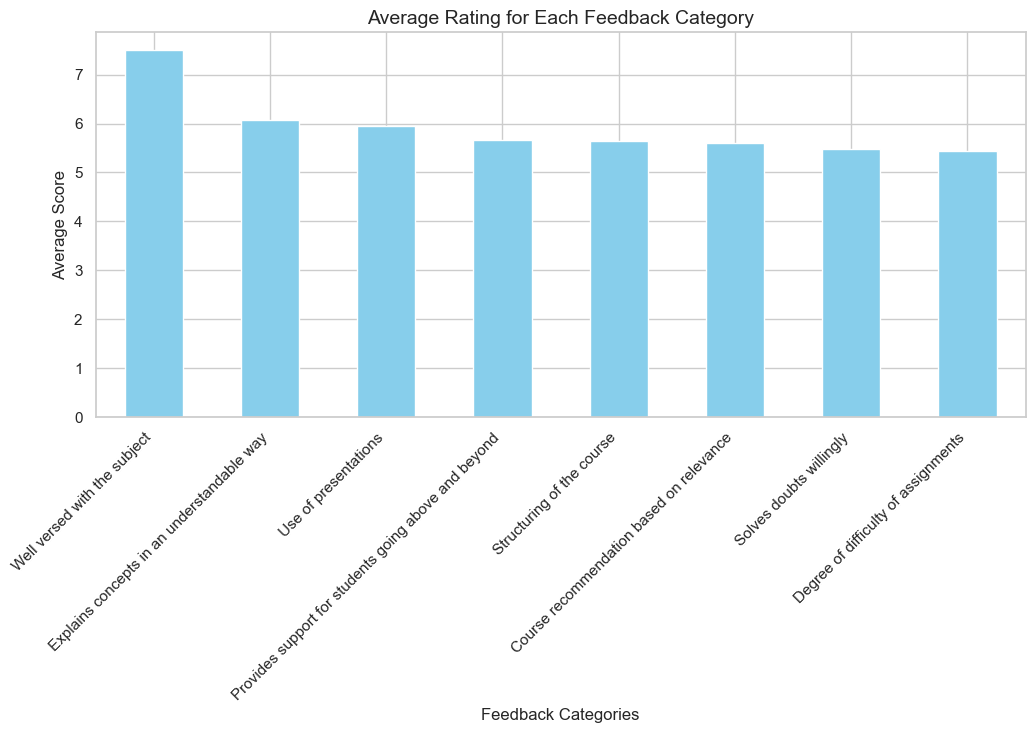

In [7]:
plt.figure(figsize=(12,5))
avg_scores.plot(kind='bar', color='skyblue')
plt.title("Average Rating for Each Feedback Category", fontsize=14)
plt.ylabel("Average Score")
plt.xlabel("Feedback Categories")
plt.xticks(rotation=45, ha='right')
plt.show()


In [8]:
best = avg_scores.idxmax()
worst = avg_scores.idxmin()

print("🏆 Best Rated Category:", best)
print("❌ Lowest Rated Category (Needs Improvement):", worst)

🏆 Best Rated Category: Well versed with the subject
❌ Lowest Rated Category (Needs Improvement): Degree of difficulty of assignments


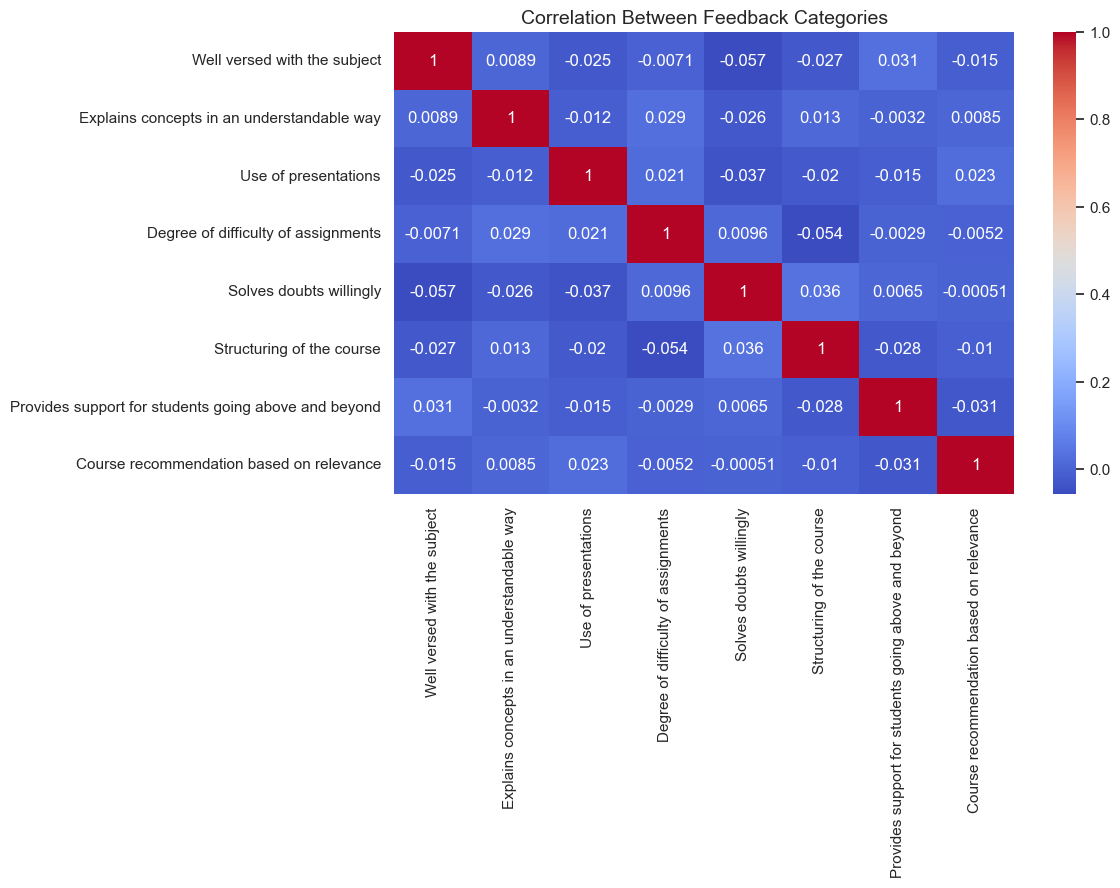

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Feedback Categories", fontsize=14)
plt.show()


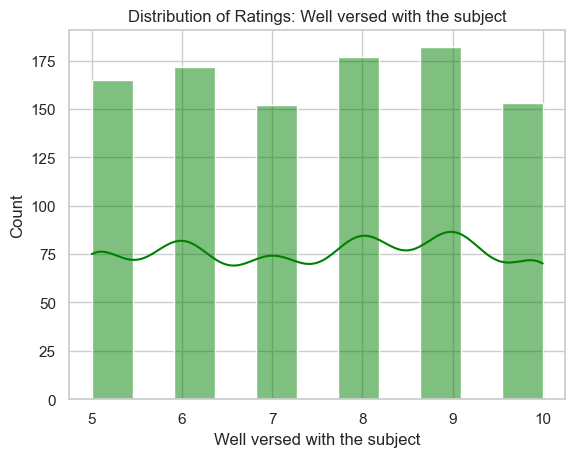

In [10]:
sample_col = df.columns[0]   # just picks first column to show distribution
sns.histplot(df[sample_col], kde=True, color='green')
plt.title(f"Distribution of Ratings: {sample_col}")
plt.show()

# 📊 Insights Summary

After analyzing the college event feedback dataset, the following insights
were identified:

✔️ The dataset contains numeric rating responses for teaching-related aspects
such as presentation usage, subject knowledge, and course structure.

🏆 The highest-rated category is **"Well versed with the subject"**, indicating
that students believe the faculty has strong command over topics.

❌ The lowest-rated category is **"Degree of difficulty of assignments"**, which
suggests that assignments may be confusing or difficult and need revision.

📌 The bar chart clearly shows variations in student satisfaction across
different parameters.

📌 The correlation heatmap reveals that **structuring of the course** and
**explains concepts clearly** are strongly related, meaning better planning
improves teaching clarity.

🎯 Recommendation:
- Review assignment difficulty and align with teaching pace
- Increase usage of engaging presentation materials
- Continue strengthening core teaching delivery (subject expertise)

Overall, the feedback highlights strong teaching ability with slight gaps in
assignment structure and presentation usage.

In [13]:
df.to_csv("cleaned_student_feedback.csv", index=False)


In [12]:
print("✨ Task Completed Successfully — Ready for Submission ✨")

✨ Task Completed Successfully — Ready for Submission ✨
